In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import h5py
import time
import random
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from scipy import signal


In [16]:
def MA(lst,N):
    return np.divide(np.convolve(lst,np.ones(N,),"valid"),N)

def rms(sample): 
    return math.sqrt(sum([x**2 for x in sample]))

def energy(sample):
    return rms(sample)/math.sqrt(len(sample))

def cross_cor(sample1,sample2): #The returned vector has len(sample1)+len(sample2)-1
    return signal.fftconvolve(sample1,sample2,"full")

def file_to_list(filename):

    infile=open(filename,'r')
    result=[]
    time=0

    i=1

    for line in infile:

        if line.strip('\n').split() and i<=150000:
            result.append(float(line.split()[0]))
        else:
            time=float(line.split()[0])

    i+=1


    infile.close()	
    return result,time



def get_sample(i):
    f=h5py.File("samples.hdf5","r")
    samp=f['Samples']
    time=f['Time']
    
    return samp[i,:],time[i]

def flatten(data,window=10): #Function to normalize auto- and cross-correlation

    temp=[0]*len(data)
    for i in range(len(data)):
        temp[i]=data[i]-np.mean(data[max(0,int(i-window/2)):min(len(data),int(i+window/2))])
    return temp

def normalize(data):
    return np.divide(np.subtract(data,np.mean(data)),np.std(data))

def smoothCCR(sample1,sample2):
    return np.log10(MA(np.absolute(flatten(cross_cor(sample1,sample2))),50))

def logCSD(sample1,sample2):
    fftF1=np.fft.rfft(sample1)
    fftF2=np.fft.rfft(sample2)
    fftF1[0]=0
    fftF2[0]=0

    return np.log10(MA(np.absolute(np.multiply(fftF1,fftF2)),250))

def logPSD(sample1,N=150):
    fftF1=np.fft.rfft(sample1)
    fftF1[0]=0

    return np.log10(MA(np.absolute(fftF1),N))


def extr(sample): 
    mn=abs(min(sample))
    mx=max(sample)
    if mn>mx:
        return mn
    else:
        return mx

def distance(vec1,vec2,K,kernel="E",gamma=1):
    d=0
    if kernel=="E" or kernel=="G":
        for i in range(len(vec1)):
           d+=K[i]*(vec1[i]-vec2[i])**2
        d=math.sqrt(d)
        if kernel=="E":
            return d
        if kernel=="G":
            return math.exp(-gamma*d)
    elif kernel=="A":
        for i in range(len(vec1)):
           d+=K[i]*abs((vec1[i]-vec2[i]))
        return d

In [96]:
C0=[]
C1=[]
C2=[]
C3=[]
C4=[]
C5=[]
C6=[]
C7=[]
C8=[]
C9=[]

for j in range(10):
    N=random.randint(0,4999)
    A,T=get_sample(N)
    for i in range(5000,5200):
        if i%10==0:
            print("Getting", i)
        B,t=get_sample(i)

        if abs(T-t)<1:
            C0.append(smoothCCR(A,B))
        elif abs(T-t)<2:
            C1.append(smoothCCR(A,B))
        elif abs(T-t)<3:
            C2.append(smoothCCR(A,B))
        elif abs(T-t)<4:
            C3.append(smoothCCR(A,B)
        elif abs(T-t)<5:
            C4.append(smoothCCR(A,B))
        elif abs(T-t)<6:
            C5.append(smoothCCR(A,B))
        elif abs(T-t)<7:
            C6.append(smoothCCR(A,B))
        elif abs(T-t)<8:
            C7.append(smoothCCR(A,B))
        elif abs(T-t)<9:
            C8.append(smoothCCR(A,B))
        else:
            C9.append(smoothCCR(A,B))
        
C0=np.mean(C0,axis=0)
C1=np.mean(C1,axis=0)
C2=np.mean(C2,axis=0)
C3=np.mean(C3,axis=0)
C4=np.mean(C4,axis=0)
C5=np.mean(C5,axis=0)
C6=np.mean(C6,axis=0)
C7=np.mean(C7,axis=0)
C8=np.mean(C8,axis=0)
C9=np.mean(C9,axis=0)








Getting 5000
Getting 5010
Getting 5020
Getting 5030
Getting 5040
Getting 5050
Getting 5060
Getting 5070
Getting 5080
Getting 5090
Getting 5100
Getting 5110
Getting 5120
Getting 5130
Getting 5140
Getting 5150
Getting 5160
Getting 5170
Getting 5180
Getting 5190
Getting 5000
Getting 5010
Getting 5020
Getting 5030
Getting 5040
Getting 5050
Getting 5060
Getting 5070
Getting 5080
Getting 5090
Getting 5100
Getting 5110
Getting 5120
Getting 5130
Getting 5140
Getting 5150
Getting 5160
Getting 5170
Getting 5180
Getting 5190
Getting 5000
Getting 5010
Getting 5020
Getting 5030
Getting 5040
Getting 5050
Getting 5060
Getting 5070
Getting 5080
Getting 5090
Getting 5100
Getting 5110
Getting 5120
Getting 5130
Getting 5140
Getting 5150
Getting 5160
Getting 5170
Getting 5180
Getting 5190
Getting 5000
Getting 5010
Getting 5020
Getting 5030
Getting 5040
Getting 5050
Getting 5060
Getting 5070
Getting 5080
Getting 5090
Getting 5100
Getting 5110
Getting 5120
Getting 5130
Getting 5140
Getting 5150
Getting 5160

In [97]:
D0=MA(C0,5000)
D1=MA(C1,5000)
D2=MA(C2,5000)
D3=MA(C3,5000)
D4=MA(C4,5000)
D5=MA(C5,5000)
D6=MA(C6,5000)
D7=MA(C7,5000)
D8=MA(C8,5000)
D9=MA(C9,5000)

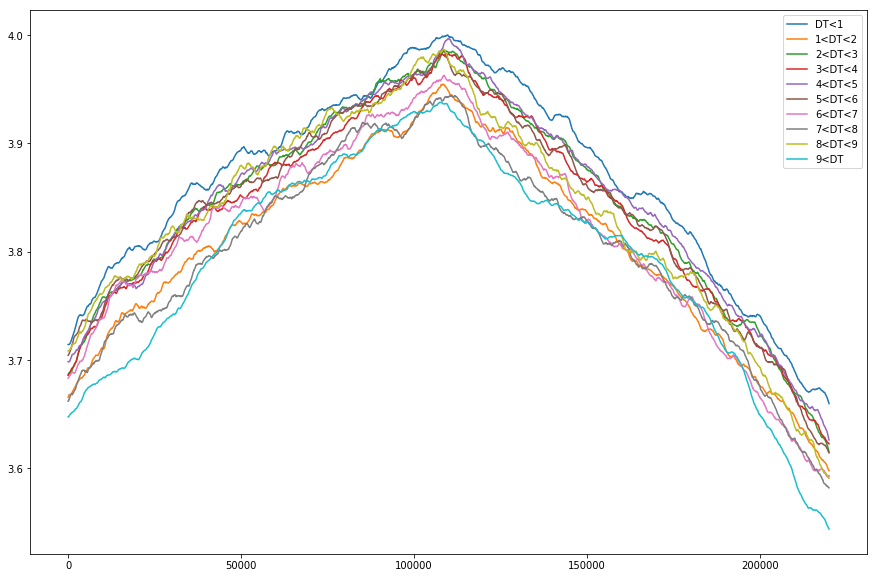

In [102]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(D0[40000:260000],label="DT<1")
ax1.plot(D1[40000:260000],label="1<DT<2")
ax1.plot(D2[40000:260000],label="2<DT<3")
ax1.plot(D3[40000:260000],label="3<DT<4")
ax1.plot(D4[40000:260000],label="4<DT<5")
ax1.plot(D5[40000:260000],label="5<DT<6")
ax1.plot(D6[40000:260000],label="6<DT<7")
ax1.plot(D7[40000:260000],label="7<DT<8")
ax1.plot(D8[40000:260000],label="8<DT<9")
ax1.plot(D9[40000:260000],label="9<DT")
ax1.legend()

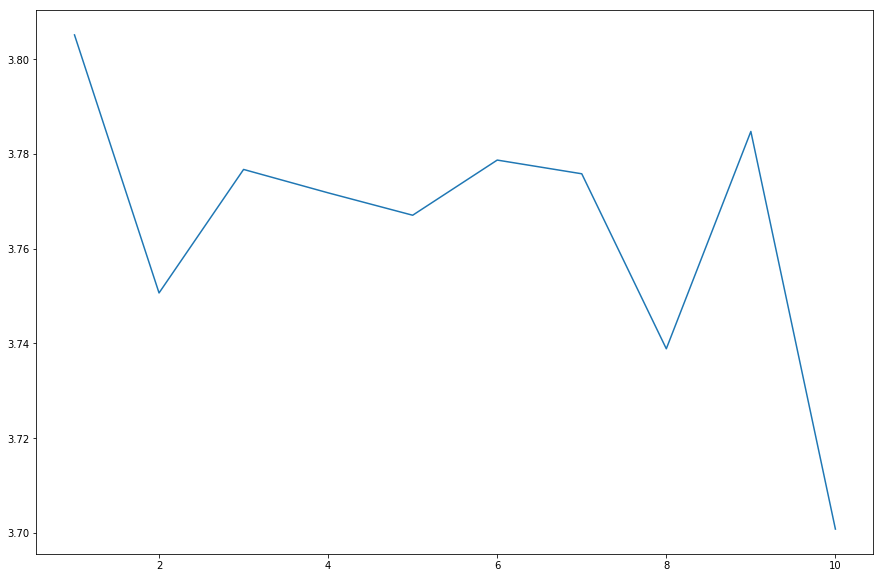

In [104]:
fig2=plt.figure(figsize=(15,10))
ax2=fig2.add_subplot(111)
ax2.plot([1,2,3,4,5,6,7,8,9,10],[D0[60000],D1[60000],D2[60000],D3[60000],D4[60000],D5[60000],D6[60000],D7[60000],D8[60000],D9[60000]])


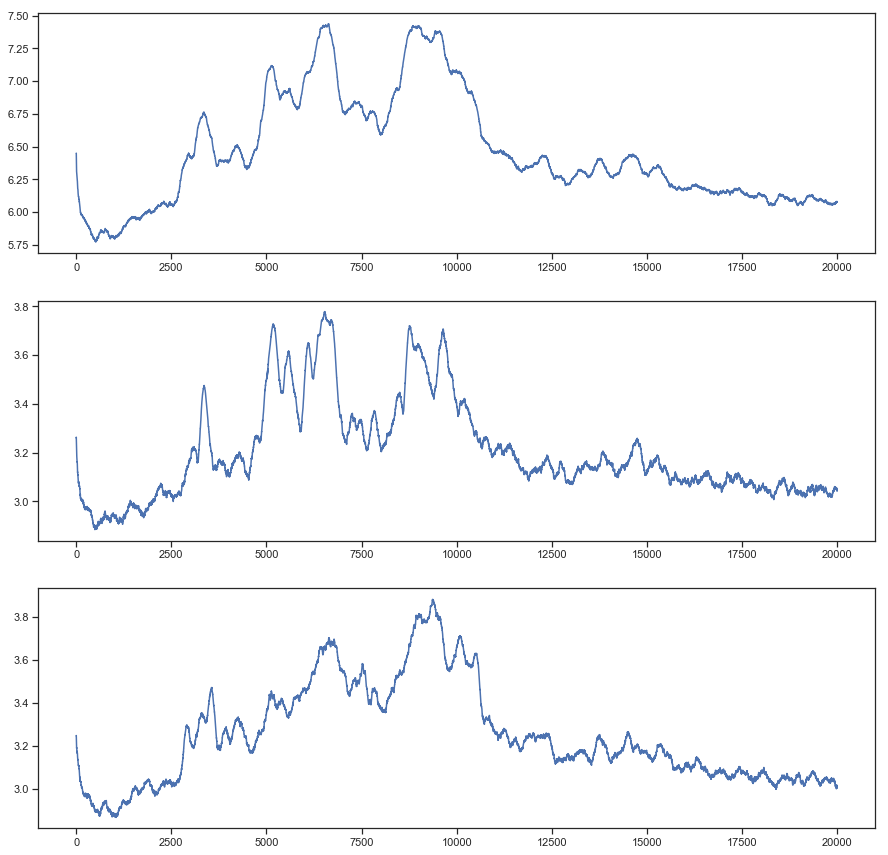

In [399]:
F1,tf1=get_sample(4358)
F2,tf2=get_sample(2734)


#Cross Spectral Density
CSD=logCSD(F1,F2)
PSD1=logPSD(F1)
PSD2=logPSD(F2)




figF1=plt.figure(figsize=(15,15))
axF1=figF1.add_subplot(311)
axF1.plot(CSD[:20000])
axF2=figF1.add_subplot(312)
axF2.plot(PSD1[:20000])
axF3=figF1.add_subplot(313)
axF3.plot(PSD2[:20000])





In [251]:
F0=[]
F1=[]
F2=[]
F3=[]
F4=[]
F5=[]
F6=[]
F7=[]
F8=[]
F9=[]
F=[]
times=[]
csds3=[]
csds5=[]
csds6=[]
csds7=[]
NF0=[]
NF1=[]
NF2=[]
NF3=[]
NF4=[]
NF5=[]
NF6=[]
NF7=[]
L=[]
Pmax=[]
Psum=[]
Psumabs=[]

for j in range(40):
    N=random.randint(0,4999)
    A,T=get_sample(N)
    print("Getting",N)
    Ap=logPSD(A)
    M=random.randint(5000,9800)
    for i in range(M,M+200):
        B,t=get_sample(i)
        
        LC=logCSD(A,B)

        if abs(T-t)<1:
            F0.append(LC[:20000])
        elif abs(T-t)<2:
            F1.append(LC[:20000])
        elif abs(T-t)<3:
            F2.append(LC[:20000])
        elif abs(T-t)<4:
            F3.append(LC[:20000])
        elif abs(T-t)<5:
            F4.append(LC[:20000])
        elif abs(T-t)<6:
            F5.append(LC[:20000])
        elif abs(T-t)<7:
            F6.append(LC[:20000])
        elif abs(T-t)<8:
            F7.append(LC[:20000])
        elif abs(T-t)<9:
            F8.append(LC[:20000])
        else:
            F9.append(LC[:20000])
            
        csds3.append(LC[3000])
        csds5.append(LC[5000])
        csds6.append(LC[6000])
        csds7.append(LC[7000])
        F.append(LC)
        times.append(abs(T-t))
        
        L.append(np.divide(LC,np.mean(LC)))
        
        Bp=logPSD(B)
        Psumabs.append(np.sum(np.absolute(np.subtract(Ap,Bp))))
        Psum.append(np.sum(np.subtract(Ap,Bp)))
        Pmax.append(max(np.subtract(Ap,Bp)))
            
        
        
F0m=np.mean(F0,axis=0)
F1m=np.mean(F1,axis=0)
F2m=np.mean(F2,axis=0)
F3m=np.mean(F3,axis=0)
F4m=np.mean(F4,axis=0)
F5m=np.mean(F5,axis=0)
F6m=np.mean(F6,axis=0)
F7m=np.mean(F7,axis=0)
F8m=np.mean(F8,axis=0)
F9m=np.mean(F9,axis=0)

Fm=np.mean(F,axis=0)
Fm=np.divide(Fm,np.mean(Fm))

for i in range(len(L)):
    temp=np.subtract(L[i],Fm)
    NF0.append(np.mean(temp[:2500]))
    NF1.append(np.mean(temp[2500:5000]))
    NF2.append(np.mean(temp[5000:7500]))
    NF3.append(np.mean(temp[7500:10000]))
    NF4.append(np.mean(temp[10000:12500]))
    NF5.append(np.mean(temp[12500:15000]))
    NF6.append(np.mean(temp[15000:17500]))
    NF7.append(np.mean(temp[17500:]))




Getting 2641
Getting 4580
Getting 418
Getting 4658
Getting 3469
Getting 2350
Getting 1868
Getting 2540
Getting 3502
Getting 2751
Getting 721
Getting 4997
Getting 3451
Getting 1467
Getting 1032
Getting 1592
Getting 3943
Getting 2219
Getting 783
Getting 2723
Getting 4713
Getting 4789
Getting 3716
Getting 3696
Getting 2668
Getting 2996
Getting 4982
Getting 3276
Getting 1960
Getting 1409
Getting 2556
Getting 1838
Getting 3220
Getting 4424
Getting 2504
Getting 792
Getting 2091
Getting 2790
Getting 1680
Getting 4483


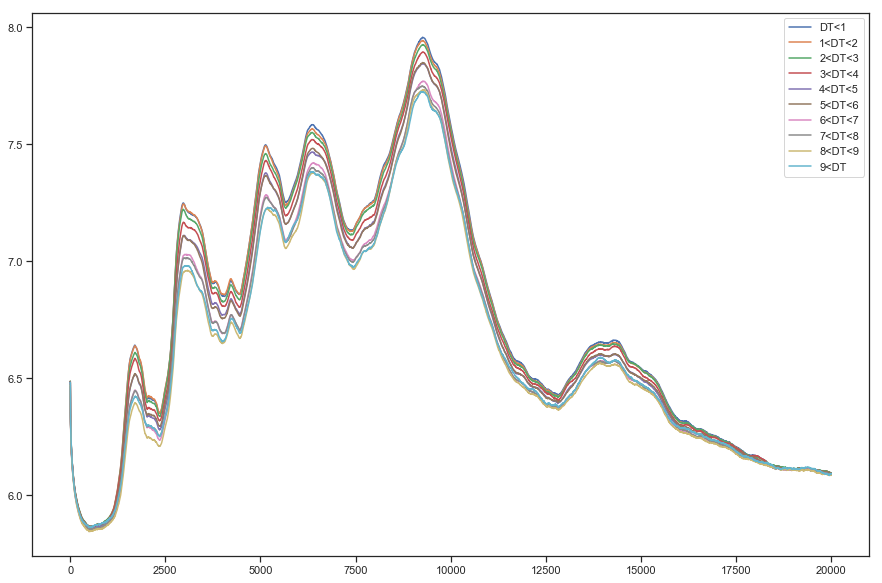

In [252]:
figC=plt.figure(figsize=(15,10))
axC=figC.add_subplot(111)
axC.plot(F0m,label="DT<1")
axC.plot(F1m,label="1<DT<2")
axC.plot(F2m,label="2<DT<3")
axC.plot(F3m,label="3<DT<4")
axC.plot(F4m,label="4<DT<5")
axC.plot(F5m,label="5<DT<6")
axC.plot(F6m,label="6<DT<7")
axC.plot(F7m,label="7<DT<8")
axC.plot(F8m,label="8<DT<9")
axC.plot(F9m,label="9<DT")
axC.legend()

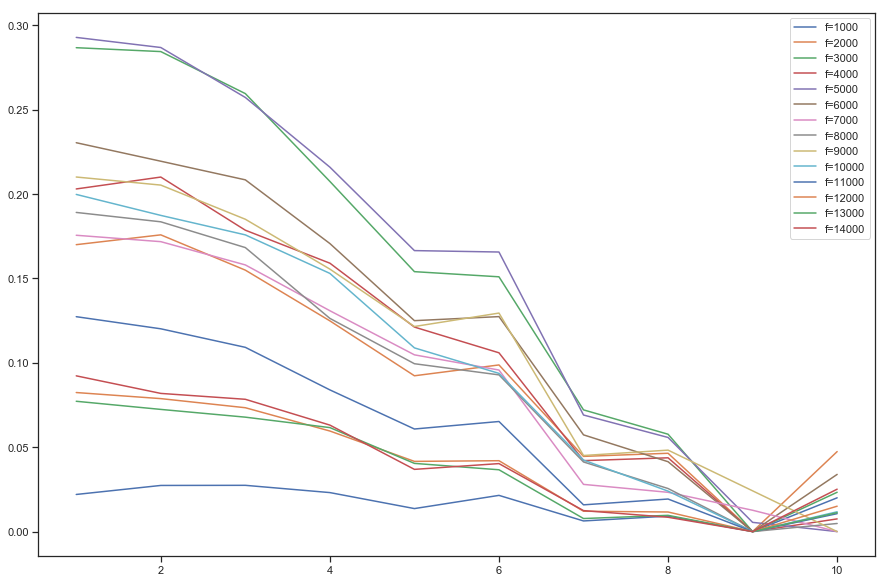

In [253]:
figF=plt.figure(figsize=(15,10))
axF=figF.add_subplot(111)
for i in range(1000,15000,1000):
    axF.plot([1,2,3,4,5,6,7,8,9,10],np.subtract([F0m[i],F1m[i],F2m[i],F3m[i],F4m[i],F5m[i],F6m[i],F7m[i],F8m[i],F9m[i]],min([F0m[i],F1m[i],F2m[i],F3m[i],F4m[i],F5m[i],F6m[i],F7m[i],F8m[i],F9m[i]])),label="f="+str(i))
    
axF.legend()




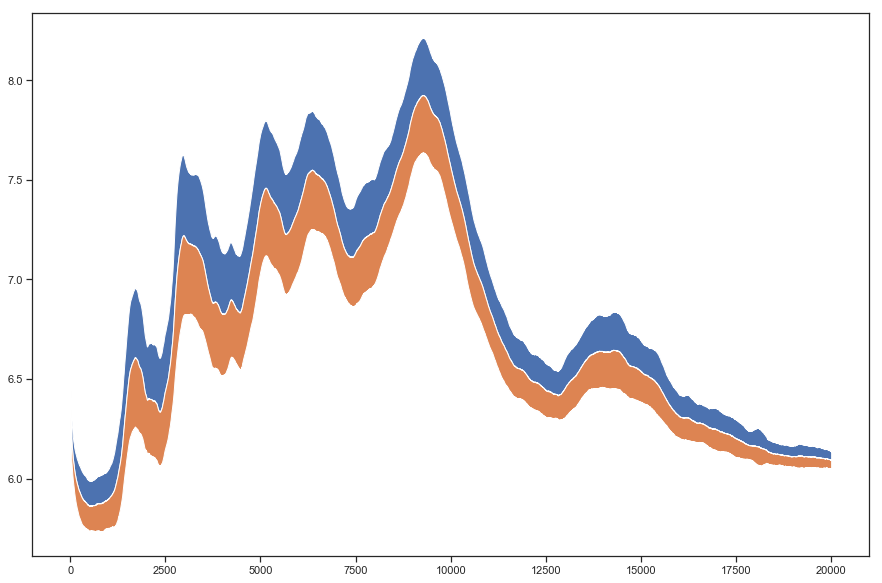

In [254]:
figk=plt.figure(figsize=(15,10))
axk=figk.add_subplot(111)
axk.fill_between([i for i in range(len(F2m))],F2m,F2m+np.std(F2,axis=0))
axk.fill_between([i for i in range(len(F2m))],F2m,F2m-np.std(F2,axis=0))





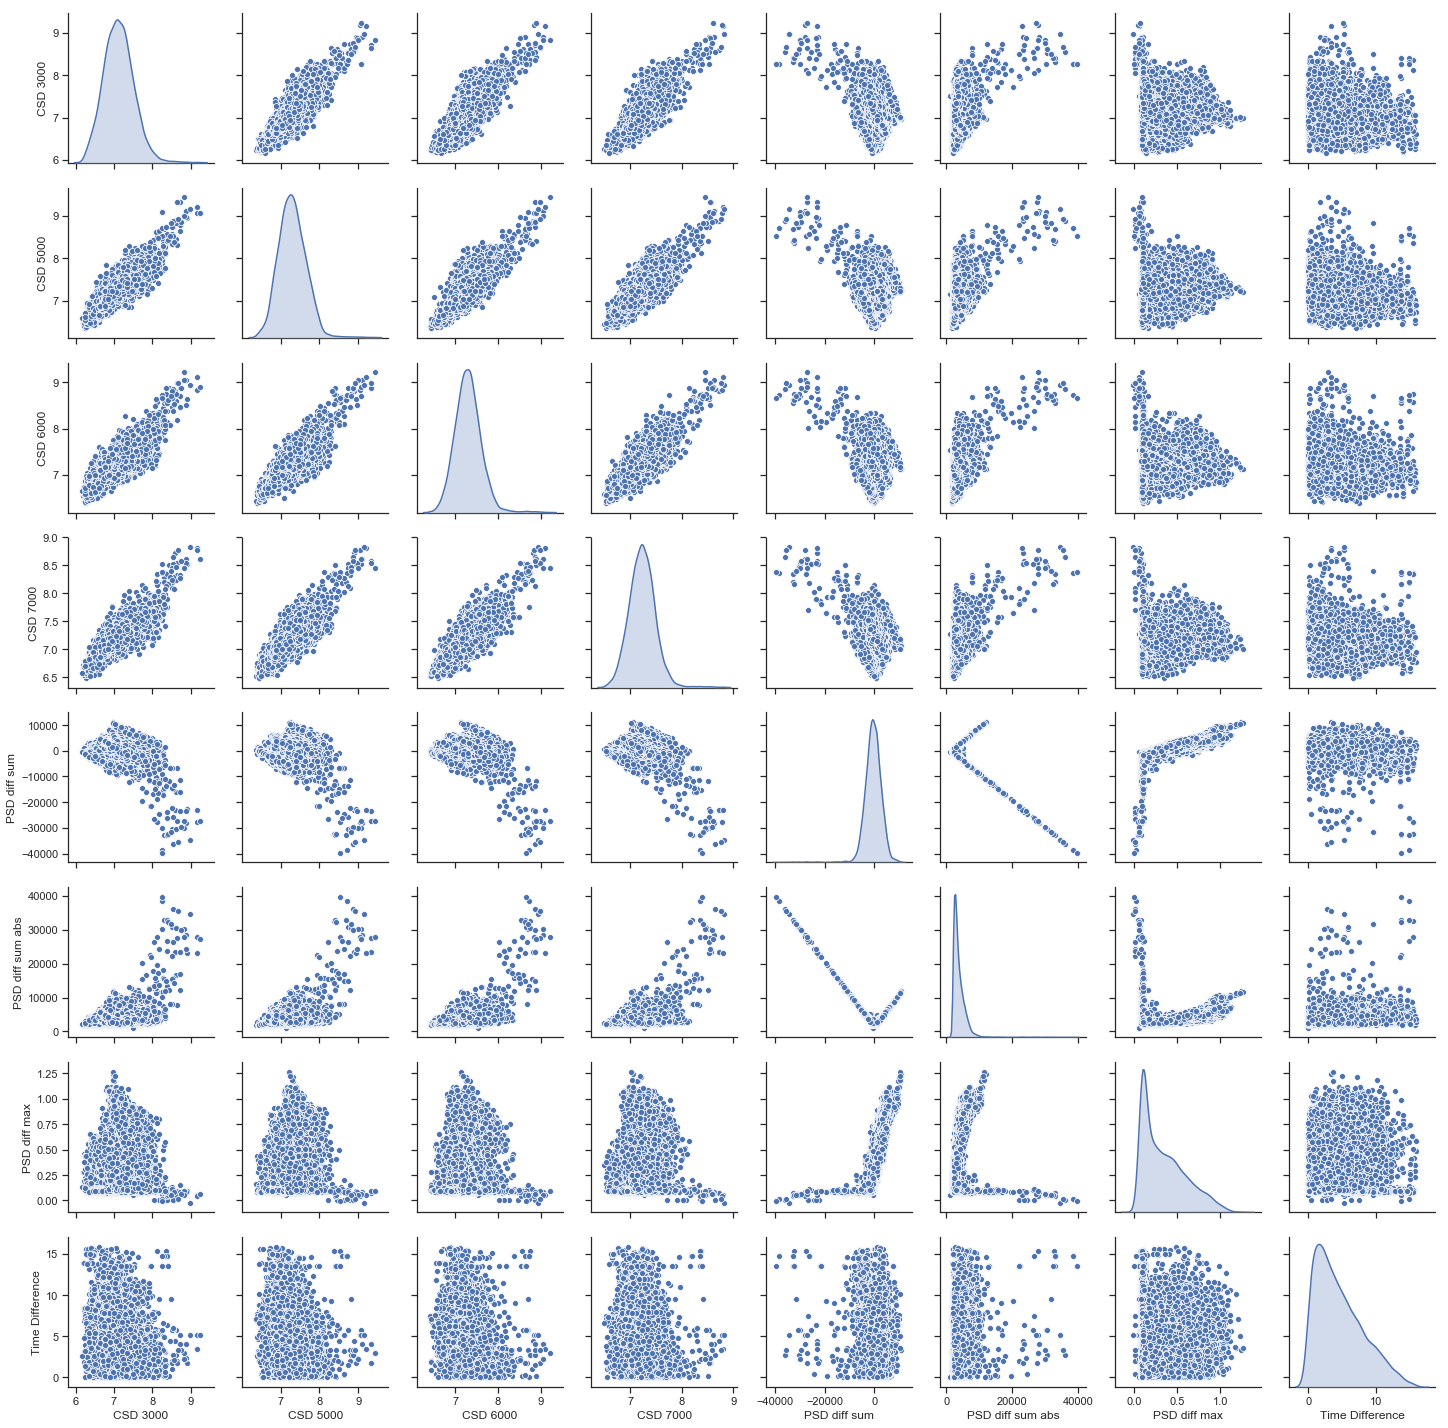

In [255]:
d = {"CSD 3000":csds3,"CSD 5000":csds5,"CSD 6000":csds6,"CSD 7000":csds7,"PSD diff sum":Psum,"PSD diff sum abs":Psumabs, "PSD diff max":Pmax,"Time Difference":times}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")

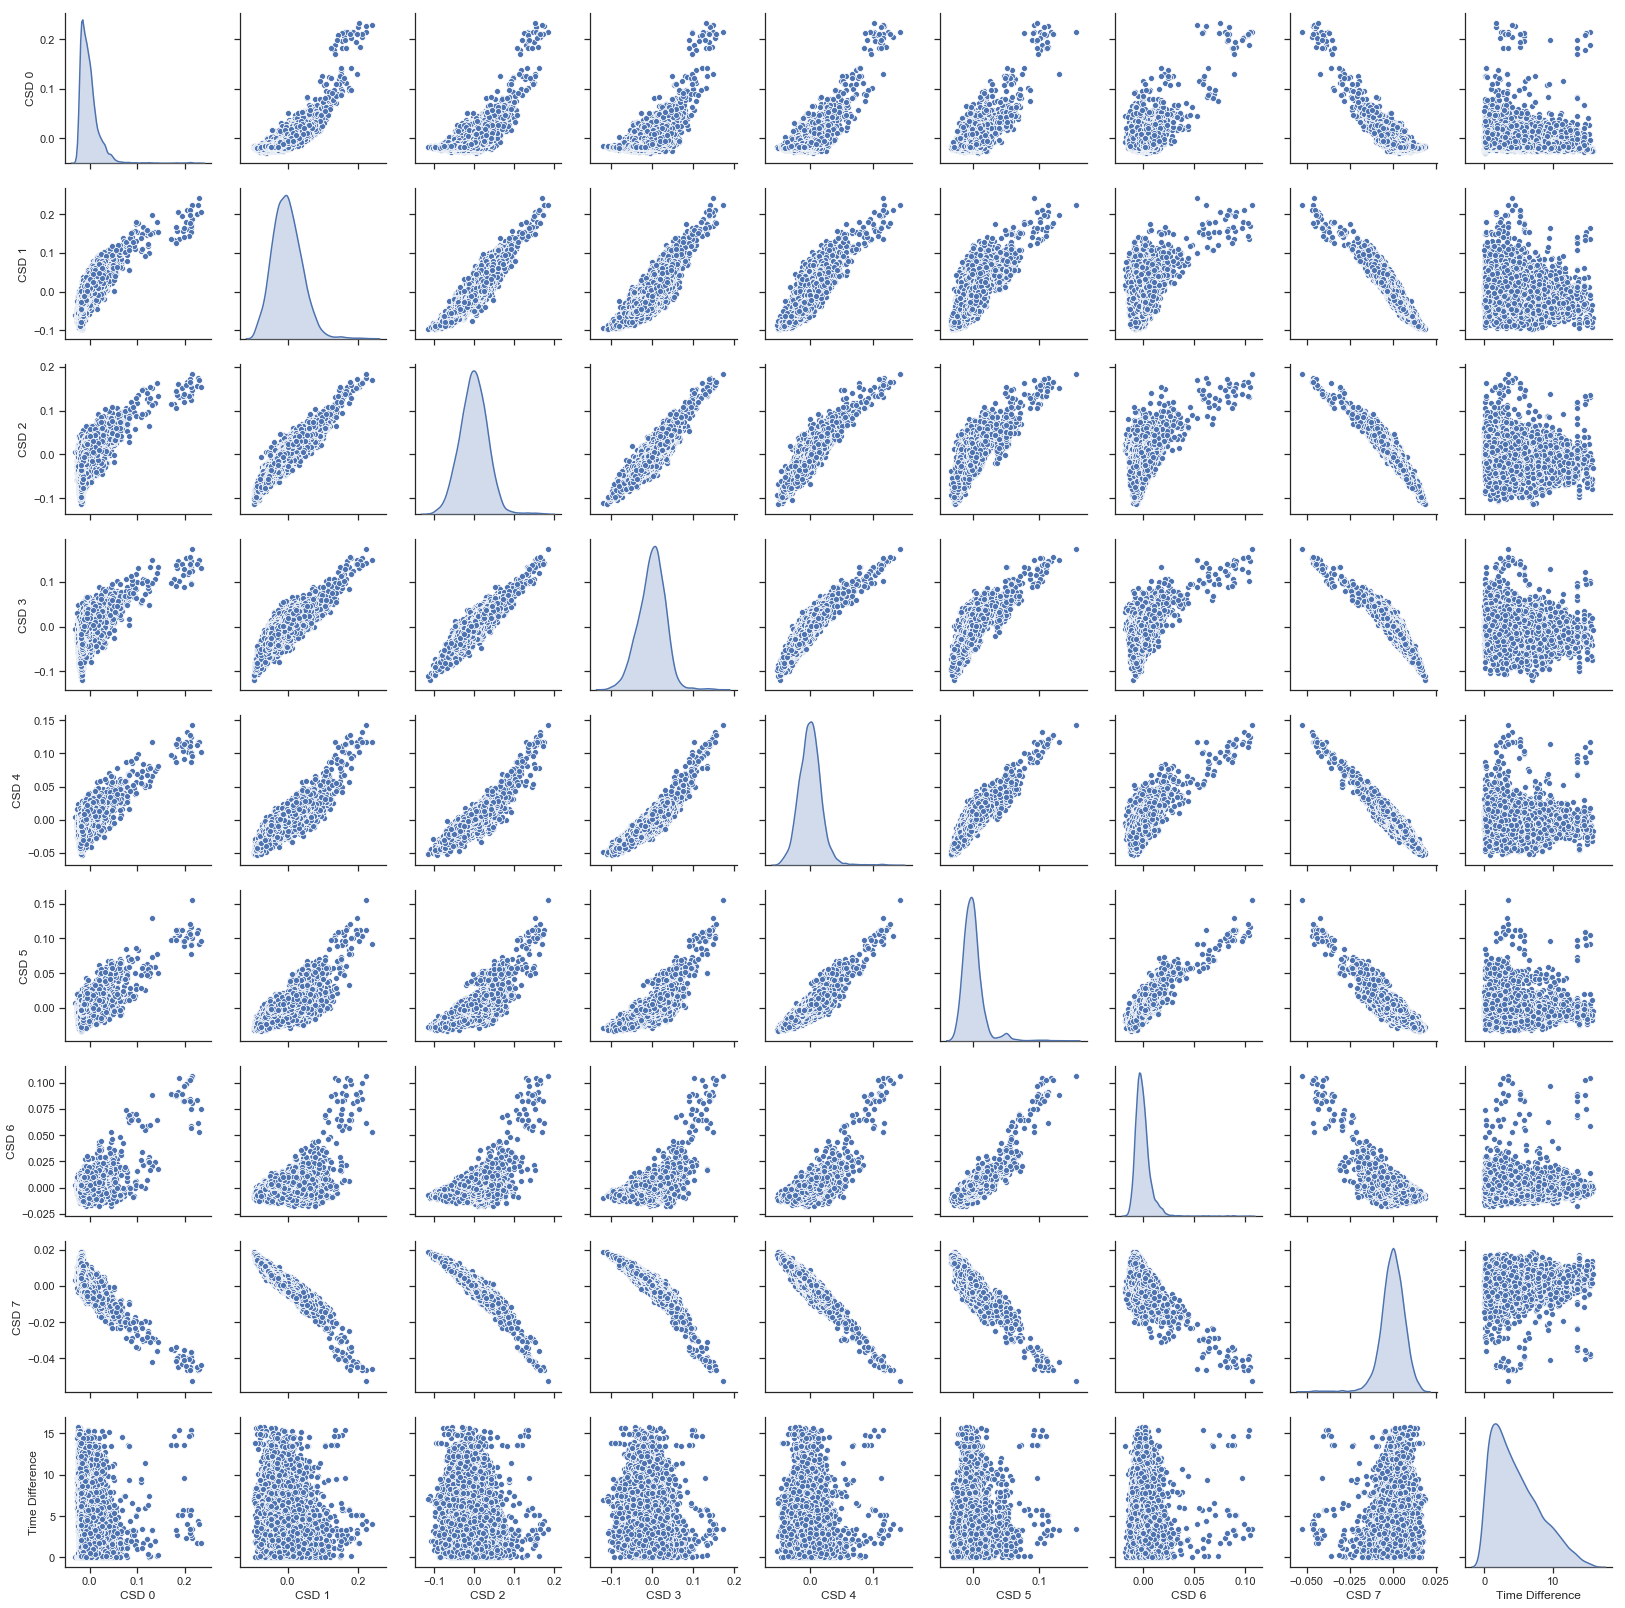

In [256]:
d = {"CSD 0":NF0,"CSD 1":NF1,"CSD 2":NF2,"CSD 3":NF3,"CSD 4":NF4,"CSD 5":NF5,"CSD 6":NF6,"CSD 7":NF7,"Time Difference":times}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")

In [345]:
Chirplet0=[]
Chirplet1=[]
Chirplet2=[]
Chirplet3=[]
Chirplet4=[]
Chirplet5=[]
Chirplet6=[]
Chirplet7=[]
Chirplet8=[]
Chirplet9=[]
Chirplet10=[]
Chirplet11=[]
Chirplet12=[]
Chirplet13=[]

for k in range(10000):
    if k%500==0:
        print(k)
    signalk,time=get_sample(k)
    if time>=0 and time<0.5:
#         m=np.mean(signal)
#         st=np.std(signal)
        mx=max(signalk)
        for i in range(500,149500,400):
            if max(signalk[i-200:i+200])==mx:
                Chirplet0.append(signalk[i-500:i+500])
                break
    elif time>=0.5 and time<1:
#         m=np.mean(signal)
#         st=np.std(signal)
        mx=max(signalk)
        for i in range(500,149500,400):
            if max(signalk[i-200:i+200])==mx:
                Chirplet1.append(signalk[i-500:i+500])
                break
    elif time>=1 and time<1.5:
#         m=np.mean(signal)
#         st=np.std(signal)
        mx=max(signalk)
        for i in range(500,149500,400):
            if max(signalk[i-200:i+200])==mx:
                Chirplet2.append(signalk[i-500:i+500])
                break
    elif time>=1 and time<2:
#         m=np.mean(signal)
#         st=np.std(signal)
        mx=max(signalk)
        for i in range(500,149500,400):
            if max(signalk[i-200:i+200])==mx:
                Chirplet3.append(signalk[i-500:i+500])
                break
    elif time>=2 and time<2.5:
#         m=np.mean(signal)
#         st=np.std(signal)
        mx=max(signalk)
        for i in range(500,149500,400):
            if max(signalk[i-200:i+200])==mx:
                Chirplet4.append(signalk[i-500:i+500])
                break
    elif time>=2.5 and time<3:
#         m=np.mean(signal)
#         st=np.std(signal)
        mx=max(signalk)
        for i in range(500,149500,400):
            if max(signalk[i-200:i+200])==mx:
                Chirplet5.append(signalk[i-500:i+500])
                break
    elif time>=3 and time<3.5:
#         m=np.mean(signal)
#         st=np.std(signal)
        mx=max(signalk)
        for i in range(500,149500,400):
            if max(signalk[i-200:i+200])==mx:
                Chirplet6.append(signalk[i-500:i+500])
                break



    

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


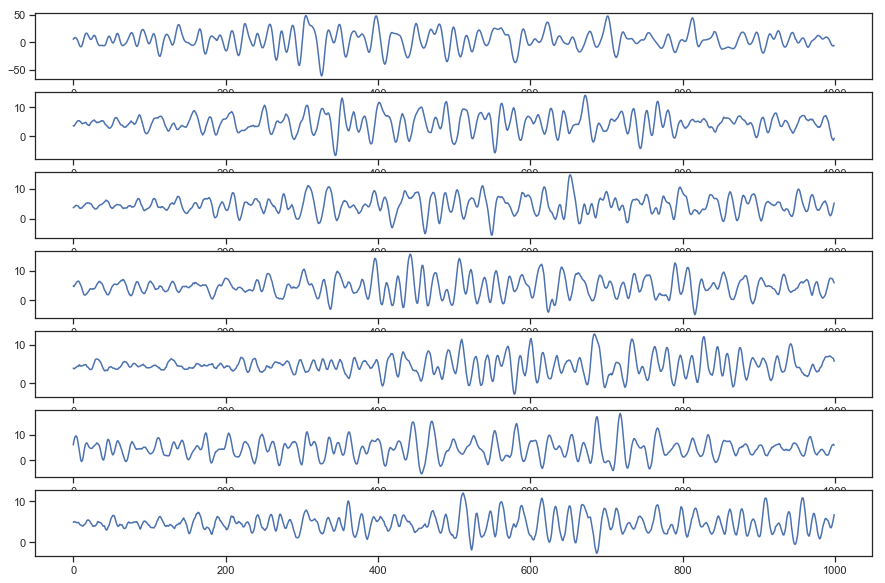

In [347]:
Chirplet0=np.mean(Chirplet0,axis=0)
Chirplet1=np.mean(Chirplet1,axis=0)
Chirplet2=np.mean(Chirplet2,axis=0)
Chirplet3=np.mean(Chirplet3,axis=0)
Chirplet4=np.mean(Chirplet4,axis=0)
Chirplet5=np.mean(Chirplet5,axis=0)
Chirplet6=np.mean(Chirplet6,axis=0)

figm=plt.figure(figsize=(15,10))
axm=figm.add_subplot(711)
axm.plot(Chirplet0)
axm1=figm.add_subplot(712)
axm1.plot(Chirplet1)
axm2=figm.add_subplot(713)
axm2.plot(Chirplet2)
axm3=figm.add_subplot(714)
axm3.plot(Chirplet3)
axm4=figm.add_subplot(715)
axm4.plot(Chirplet4)
axm5=figm.add_subplot(716)
axm5.plot(Chirplet5)
axm6=figm.add_subplot(717)
axm6.plot(Chirplet6)


In [348]:
C0=[]
C1=[]
C2=[]
C3=[]
C4=[]
C5=[]
C6=[]
Ts=[]
for k in range(3000):
    if k%500==0:
        print(k)
    sig,ts=get_sample(k)
    C0.append(np.sum(np.absolute(np.convolve(sig,Chirplet0,'valid'))))
    C1.append(np.sum(np.absolute(np.convolve(sig,Chirplet1,'valid'))))
    C2.append(np.sum(np.absolute(np.convolve(sig,Chirplet2,'valid'))))
    C3.append(np.sum(np.absolute(np.convolve(sig,Chirplet3,'valid'))))
    C4.append(np.sum(np.absolute(np.convolve(sig,Chirplet4,'valid'))))
    C5.append(np.sum(np.absolute(np.convolve(sig,Chirplet5,'valid'))))
    C6.append(np.sum(np.absolute(np.convolve(sig,Chirplet5,'valid'))))
    Ts.append(ts)
    
    

0
500
1000
1500
2000
2500


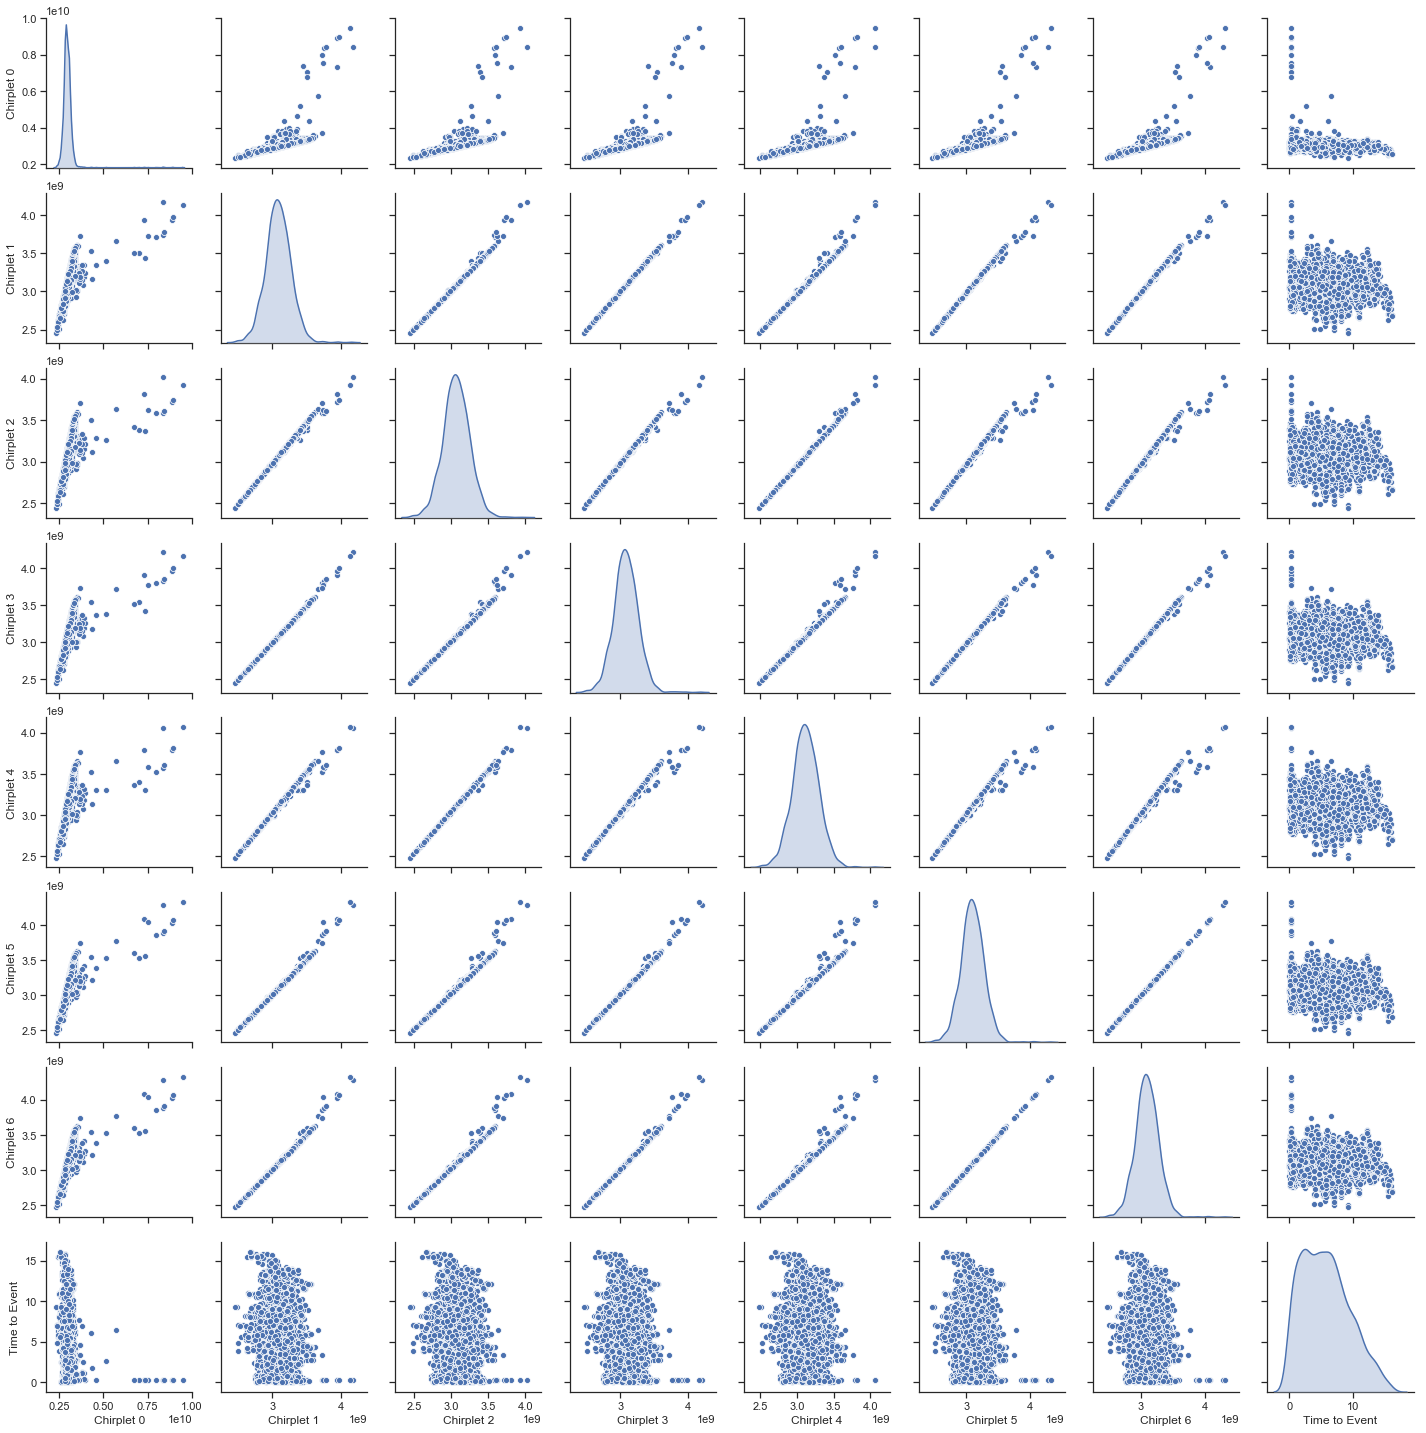

In [349]:
d = {"Chirplet 0":C0,"Chirplet 1":C1,"Chirplet 2":C2,"Chirplet 3":C3,"Chirplet 4":C4,"Chirplet 5":C5,"Chirplet 6":C6,"Time to Event":Ts}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")

(0, 150)

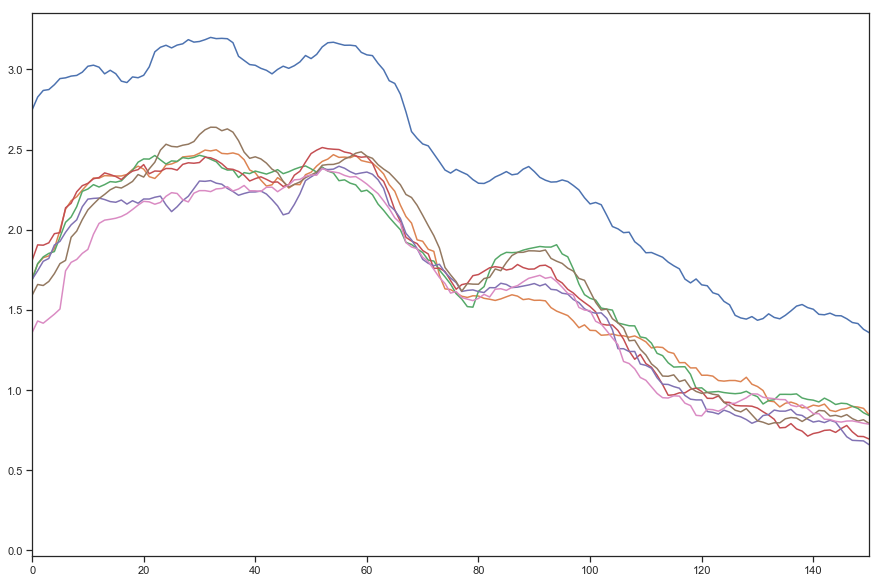

In [361]:
figpsd=plt.figure(figsize=(15,10))
ax1=figpsd.add_subplot(111)
ax1.plot(logPSD(Chirplet0,15))
ax1.plot(logPSD(Chirplet1,15))
ax1.plot(logPSD(Chirplet2,15))
ax1.plot(logPSD(Chirplet3,15))
ax1.plot(logPSD(Chirplet4,15))
ax1.plot(logPSD(Chirplet5,15))
ax1.plot(logPSD(Chirplet6,15))
ax1.set_xlim((0,150))

6.123397


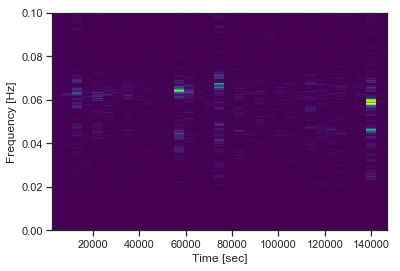

In [337]:
x,tx=get_sample(4364)
f, t, Sxx = signal.spectrogram(x,nperseg=5000)
mesh=plt.pcolormesh(t, f, Sxx,cmap="viridis")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,0.1))
print(tx)


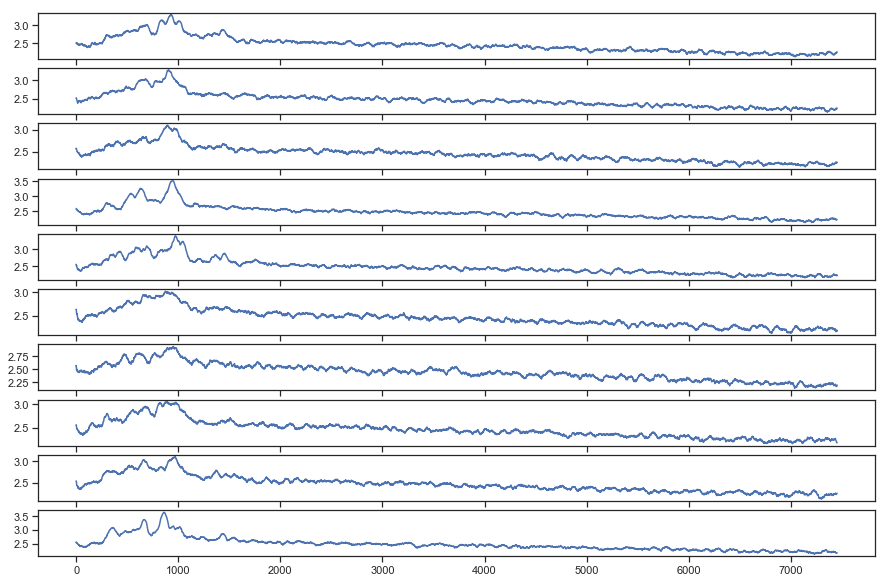

In [339]:
fig=plt.figure(figsize=(15,10))
ax=[]
for i in range(10):
    ax.append(fig.add_subplot(10,1,i+1))
    ax[-1].plot(logPSD(x[15000*i:(i+1)*15000],50))

In [351]:
Loc_ens=[]
Ts=[]
for k in range(10000):
    if k%500==0:
        print(k)
    signalk,time=get_sample(k)
    mx=max(signalk)
    for i in range(500,149500,400):
        if max(signalk[i-200:i+200])==mx:
            Loc_ens.append(energy(signalk[i-500:i+500]))
            Ts.append(time)
            break
            

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


(0, 200)

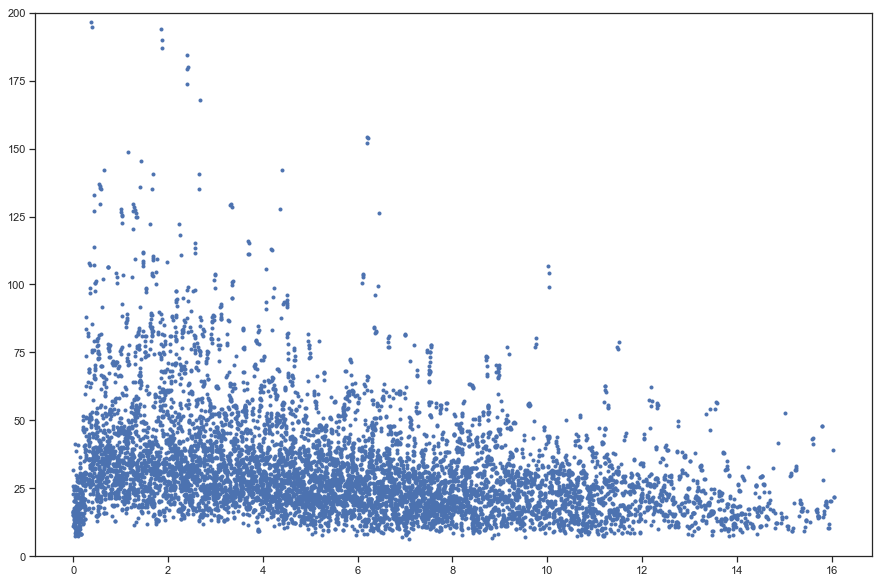

In [353]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
ax.plot(Ts,Loc_ens,'.')
ax.set_ylim((0,200))

In [386]:
fs=np.arange(500)

Dat=3*np.exp(-(fs-10)**2/10)+3*np.exp(-(fs-30)**2/10)+3*np.exp(-(fs-60)**2/10)+2.5*np.exp(-(fs-90)**2/20)+1.5*np.exp(-(fs-140)**2/20)


In [387]:
Dat=np.power(10,Dat)
Dat[0]=1
Dat=np.fft.irfft(Dat)
Dat=np.concatenate((Dat[449:],Dat[:449]))

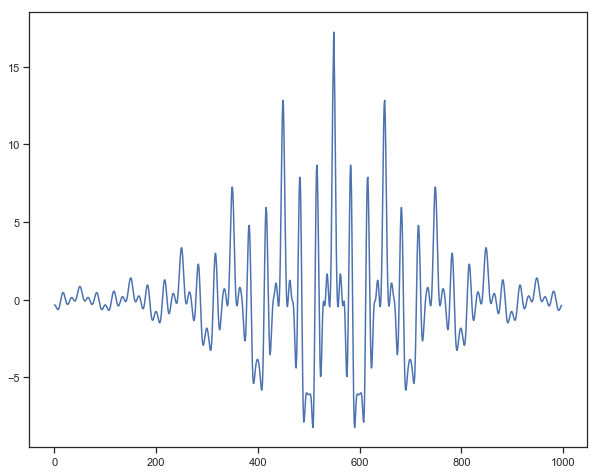

In [388]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.plot(range(998),Dat)


In [396]:
C=[]

Ts=[]
for k in range(3000):
    if k%500==0:
        print(k)
    sig,ts=get_sample(k)
    C.append(np.sum(np.absolute(np.convolve(sig,Dat,'valid'))))

    Ts.append(ts)


    

0
500
1000
1500
2000
2500


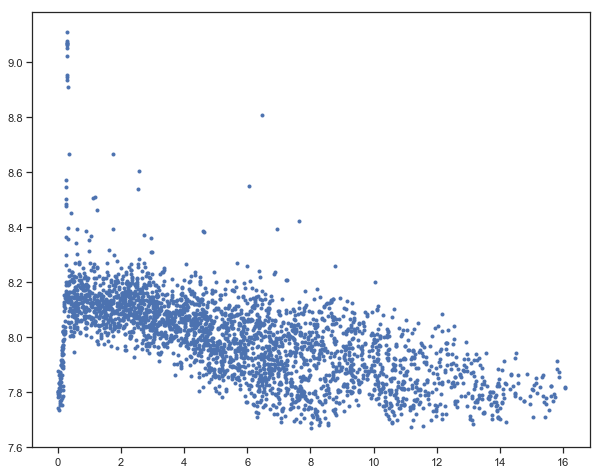

In [397]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.plot(Ts,np.log10(C),'.')

In [401]:
Params=np.zeros((10000,28))
T=np.zeros(10000)
for i in range(10000):
    if i%500==0:
        print(i)
    x,t=get_sample(i)
    T[i]=t
    Params[i,0]=energy(x)
    Params[i,1]=extr(x)
    px=logPSD(x)
    mx=np.mean(px)
    for j in range(17):
        Params[i,j+2]=px[2000+j*500]/mx
    for j in range(8):
        Params[i,j+19]=energy(px[j*2500:(j+1)*2500])/mx
    Params[i,27]=np.log10(np.sum(np.absolute(np.convolve(x,Dat,'valid'))))

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [13]:
f=h5py.File("norm_pars.hdf5","r")
ParamsN=f['Parameters']
T=f["Time"]

In [414]:
print(Params[1,:])
ParamsN=Params[:]
for k in range(28):
    ParamsN[:,k]=np.divide(np.subtract(Params[:,k],np.mean(Params[:,k])),np.std(Params[:,k]))
    if k<2:
        print(np.mean(Params[:,k],axis=0),np.std(Params[:,k],axis=0))
print(ParamsN[1,:])

[  8.25985149 150.           1.05703711   1.04033531   1.26826147
   1.20149222   1.09977379   1.12467283   1.20489503   1.21540276
   1.22434049   1.32403726   1.23367353   1.16303519   1.23987151
   1.23672736   1.30862735   1.33241999   1.28800853   1.0171113
   1.15228483   1.25452803   1.27945193   1.14556587   1.09996127
   1.0637408    1.01412972   8.08485991]
8.079499895354923 7.823496041985309
167.5028 279.70753867595346
[ 0.02305256 -0.06257536 -0.15788451 -0.27157096  0.83084357  0.33719078
 -0.50329812 -0.08623822 -0.03426119 -0.07099809  0.18962656  1.22765231
  0.40033242 -0.35384321  0.7927166   0.00365101  0.3708093   0.61404891
  0.64397048 -0.20891685  0.00603989  0.65337262  0.58602278  0.28606714
  0.57573909  0.70938432 -0.70095517  0.5708986 ]


In [18]:
# Ks=np.ones(28)
Ks=[3.93278957, 3.63758166, 9.134889,   0.32610648, 1.04770127, 2.79803113, 0.43384903,4.12560647, 9.74157982, 7.93717854, 4.02139398, 6.54287502,0.10967573 ,7.69917764 ,7.91254239, 4.52369386, 8.07713647 ,1.35911856, 5.95890569, 6.00522806 ,3.24306552, 6.61176434 ,1.20116204, 8.73377254, 1.75164027, 1.58217587, 4.31960939 ,3.78805316 ]
DsE=[]
DsG=[]
DsA=[]
DTs=[]

for j in range(40):
    N=random.randint(0,4999)
    M=random.randint(5000,9800)
    for i in range(M,M+200):
        DsE.append(distance(ParamsN[N,:],ParamsN[i,:],Ks))
        DsG.append(distance(ParamsN[N,:],ParamsN[i,:],Ks,kernel="G",gamma=0.1))
        DsA.append(distance(ParamsN[N,:],ParamsN[i,:],Ks,kernel="A"))
        DTs.append(abs(T[N]-T[i]))

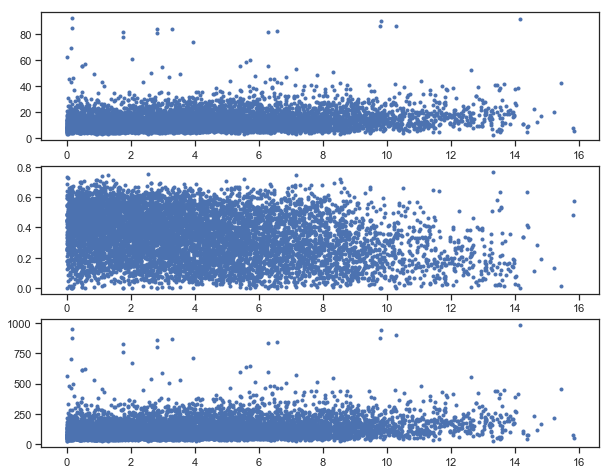

In [20]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(311)
ax.plot(DTs,DsE,'.')
ax1=fig.add_subplot(312)
ax1.plot(DTs,DsG,'.')
ax2=fig.add_subplot(313)
ax2.plot(DTs,DsA,'.')
